# Blackbox Optimization Challenge

## Getting Started

1. Replace the placeholder credentials with your personal initials and PIN
2. Run the setup cell to initialize the API client
3. Use this notebook as a starting point for your optimization approach
4. Feel free to modify and extend this code to implement your own strategies

See instructions.md for detailed information about the challenge.

# Setup and Help Functions


In [28]:
# Setup cell
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_URL = "http://goedel-api.gm.fh-koeln.de:8000" 

# Authentication data
INITIALS = "SS"  # Student initials
PIN = "RbxjJ6mG"   # Generated PIN

# Helper class for API interaction
class ExperimentAPI:
    def __init__(self, base_url, initials, pin):
        self.base_url = base_url
        self.initials = initials
        self.pin = pin
    
    def run_experiment(self, params, replicates=1):
        """Performs an experiment run."""
        payload = {
            "initials": self.initials,
            "pin": self.pin,
            "params": params,
            "replicates": replicates
        }
        
        response = requests.post(f"{self.base_url}/run", json=payload)
        
        if response.status_code == 200:
            try:
                return response.json()
            except Exception as e:
                print(f"JSON parsing error: {e}")
                return None
        else:
            print(f"Error: {response.status_code}")
            try:
                error_detail = response.json().get("detail", "Unknown error")
                print(f"Error message: {error_detail}")
            except:
                print("No valid JSON response in error message")
            return None
    
    def get_history(self):
        """Retrieves history of all experiments."""
        params = {"initials": self.initials, "pin": self.pin}
        response = requests.get(f"{self.base_url}/history", params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            print(response.json().get("detail", "Unknown error"))
            return None
    
    def get_leaderboard(self):
        """Retrieves the leaderboard."""
        response = requests.get(f"{self.base_url}/leaderboard")
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            print(response.json().get("detail", "Unknown error"))
            return None
        
    def get_budget(self):
        """Retrieves the current remaining budget."""
        params = {"initials": self.initials, "pin": self.pin}
        response = requests.get(f"{self.base_url}/budget", params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            print(response.json().get("detail", "Unknown error"))
            return None

# Initialize API client
api = ExperimentAPI(BASE_URL, INITIALS, PIN)

# Perform a first request.

> **Warning**: Each experiment (also this) costs budget points. Be strategic about your experiments to maximize your learning with limited resources. 


> **Note**: The random values and thresholds used here are completely arbitrary and should be carefully reviewed and adjusted before the first test.

In [29]:
# Initial attempt cell
# Parameters for the first attempt with random values
import random

# Generate random values in sensible ranges
initial_params = {
    "Zn": 71.38,
    "Al": 49.60,
    "N": 16.80,
    "Fe": 9.06,
    "Ca": 34.43,
    "P": 16.56,
    "Cu": 91.74,
    "Cl": 17.59,
    "K": 39.53,
    "B": 29.53,
    "Mg": 46.21,
    "Mo": 81.22,
    "S": 26.48,
    "H": 66.38,
    "Na": 60.83
}

# Perform experiment with 3 replications
result = api.run_experiment(initial_params, replicates=5)
budget_info = api.get_budget()
print("Your current budget:", budget_info["budget"])


# Display the results:
if result:
    print(f"Current round: {result['current_round']}")
    print(f"Replications: {result['replicates']}")
    print(f"Cost for this run: {result['run_cost']}")
    print(f"Remaining budget: {result['remaining_budget']}")
    
    print("\nResults with noise:")
    for i, run in enumerate(result['runs']):
        print(f"  Replication {i+1}: {run['yield_noisy']:.4f}")

    # show admin-specific information if available
    if "true_yield" in result:
        print(f"\nAdmin Info:")
        print(f"  True yield (without noise): {result['true_yield']:.4f}")
        print(f"  Noise variance in this round: {result['noise_variance']:.4f}")

Error: 403
Error message: Insufficient budget. Required: 21, Available: 1
Your current budget: 1


# Analyzing historical data.


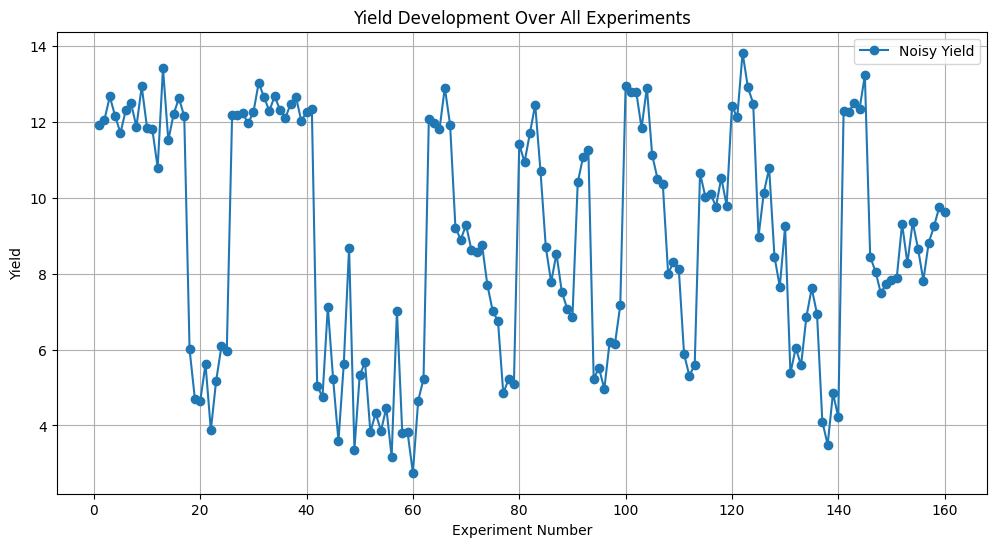

,N,P,K,Na,Ca,Mg,Zn,Al,Fe,Cu,Cl,B,Mo,S,H,yield_noisy,round
159,8.500000,8.800000,7.900000,14.000000,8.100000,9.400000,14.800000,10.400000,9.200000,12.400000,7.200000,7.100000,10.100000,6.300000,6.600000,11.908057,1
158,8.500000,8.800000,7.900000,14.000000,8.100000,9.400000,14.800000,10.400000,9.200000,12.400000,7.200000,7.100000,10.100000,6.300000,6.600000,12.064313,1
157,8.500000,8.800000,7.900000,14.000000,8.100000,9.400000,14.800000,10.400000,9.200000,12.400000,7.200000,7.100000,10.100000,6.300000,6.600000,12.671677,1
156,13.100000,6.500000,11.400000,12.300000,10.200000,9.100000,5.600000,11.100000,6.700000,7.100000,9.600000,12.300000,5.800000,14.100000,11.700000,12.155732,1
155,13.100000,6.500000,11.400000,12.300000,10.200000,9.100000,5.600000,11.100000,6.700000,7.100000,9.600000,12.300000,5.800000,14.100000,11.700000,11.709901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.866876,3.706249,31.528354,20.050677,11.404927,40.640725,34.426076,72.384258,7.886054,84.669811,60.449593,65.254609,77.529421,57.664674,77.546582,7.820345,10
3,0.866876,3.706249,31.528354,20.050677,11.404927,40.640725,34.426076,72.384258,7.886054,84.669811,60.449593,65.254609,77.529421,57.664674,77.546582,8.814680,10
2,43.028761,11.913374,11.596405,29.159183,48.345549,32.666195,65.348548,40.906781,5.550181,30.360246,74.131035,33.968125,61.687622,24.961888,59.261951,9.246048,10
1,43.028761,11.913374,11.596405,29.159183,48.345549,32.666195,65.348548,40.906781,5.550181,30.360246,74.131035,33.968125,61.687622,24.961888,59.261951,9.761975,10


C:\Users\USER\AppData\Local\Temp\ipykernel_17648\54173180.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_by_round = df.groupby("round").apply(lambda x: x.loc[x["yield_noisy"].idxmax()]).reset_index(drop=True)


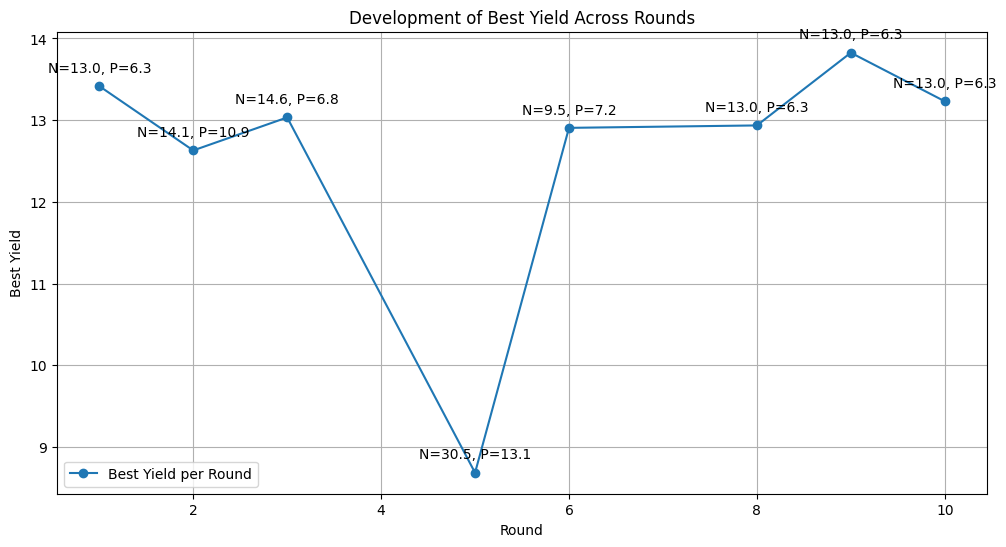

Best parameters so far:
  N: 13.00
  P: 6.30
  K: 5.50
  Na: 10.20
  Ca: 11.20
  Mg: 12.70
Yield: 13.8248 (Round 9)


In [30]:
# History analysis cell
# Retrieve and analyze history data
history = api.get_history()

if history:
    # Convert to DataFrame
    df = pd.DataFrame(history)
    
    # Sort by timestamp
    df = df.sort_values("timestamp")
    
    # Show results over time
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(df)+1), df["yield_noisy"], 'o-', label="Noisy Yield")
    plt.xlabel("Experiment Number")
    plt.ylabel("Yield")
    plt.title("Yield Development Over All Experiments")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display experiment data table with all 15 parameters
    display(df[["N", "P", "K", "Na", "Ca", "Mg", "Zn", "Al", "Fe", "Cu", "Cl", "B", "Mo", "S", "H", "yield_noisy", "round"]])
    
    # Best results per round
    best_by_round = df.groupby("round").apply(lambda x: x.loc[x["yield_noisy"].idxmax()]).reset_index(drop=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(best_by_round["round"], best_by_round["yield_noisy"], 'o-', label="Best Yield per Round")
    
    # Add labels for best points
    for _, row in best_by_round.iterrows():
        label = f"N={row['N']:.1f}, P={row['P']:.1f}"
        plt.annotate(label, (row["round"], row["yield_noisy"]), 
                     textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel("Round")
    plt.ylabel("Best Yield")
    plt.title("Development of Best Yield Across Rounds")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display the best parameters
    best_run = df.loc[df["yield_noisy"].idxmax()]
    print("Best parameters so far:")
    for param in ["N", "P", "K", "Na", "Ca", "Mg"]:
        print(f"  {param}: {best_run[param]:.2f}")
    print(f"Yield: {best_run['yield_noisy']:.4f} (Round {best_run['round']})")

# View leaderboard


,Initials,Best Yield
0,MP,13.888526
1,SS,13.824762
2,MS,13.700812
3,JG,13.509877
4,NV,13.456305
5,PG,13.447879
6,MD,13.421746
7,ND,13.401697
8,HP,13.294258
9,YJ,13.268782


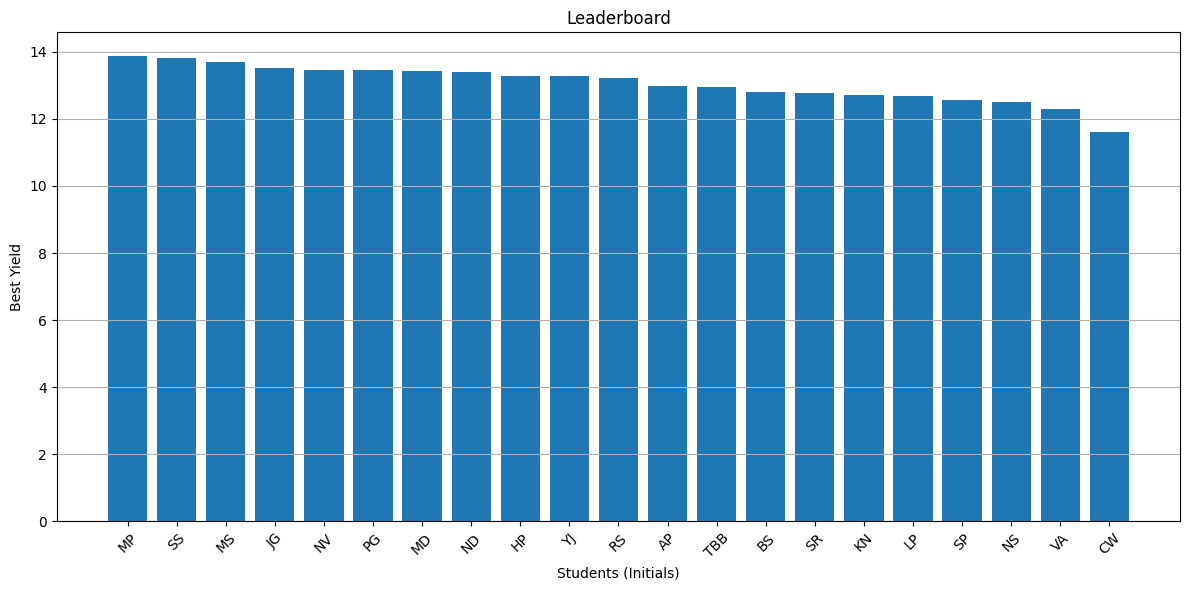

In [31]:
# Leaderboard cell
# Retrieve and display leaderboard
leaderboard = api.get_leaderboard()

if leaderboard:
    # Convert to DataFrame and sort
    lb_df = pd.DataFrame(
        {"Initials": list(leaderboard.keys()), 
         "Best Yield": list(leaderboard.values())}
    ).sort_values("Best Yield", ascending=False)
    
    # Display as table
    display(lb_df)
    
    # Visualize as bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(lb_df["Initials"], lb_df["Best Yield"])
    plt.xlabel("Students (Initials)")
    plt.ylabel("Best Yield")
    plt.title("Leaderboard")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Show remaining budget


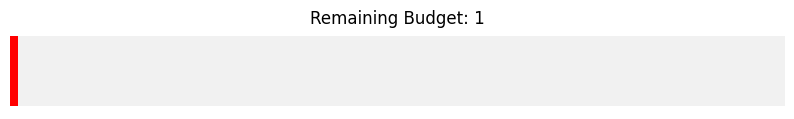

⚠️ WARNING: Less than 25% of your budget remaining!
🚨 CRITICAL: Less than 10% of your budget remaining!

Budget Tip: Each round provides 100 budget units.
Cost per replication: 1st: 10 units, 2nd-4th: 3 units each, 5th-7th: 2 units each, 8th-10th: 1 unit each


In [32]:
# Budget visualization cell
# Retrieve and display current budget status
def display_budget_status():
    budget_info = api.get_budget()
    
    if budget_info:
        if budget_info["budget"] == "unlimited":
            print("You have unlimited budget (admin account)")
        else:
            budget = budget_info["budget"]
            # Create a visual representation of the budget
            plt.figure(figsize=(10, 1))
            plt.barh(0, 100, color='lightgrey', alpha=0.3)
            
            # Color code: green if more than 25%, yellow if between 10-25%, red if less than 10%
            color = 'green'
            if budget < 25:
                color = 'yellow'
            if budget < 10:
                color = 'red'
                
            plt.barh(0, budget, color=color)
            plt.xlim(0, 100)
            plt.title(f"Remaining Budget: {budget}")
            plt.axis('off')
            plt.show()
            
            # Budget warnings
            if budget < 25:
                print("⚠️ WARNING: Less than 25% of your budget remaining!")
            if budget < 10:
                print("🚨 CRITICAL: Less than 10% of your budget remaining!")
            
            # Budget efficiency tip
            print(f"\nBudget Tip: Each round provides 100 budget units.")
            print(f"Cost per replication: 1st: 10 units, 2nd-4th: 3 units each, 5th-7th: 2 units each, 8th-10th: 1 unit each")
    else:
        print("Failed to retrieve budget information")

# Display current budget status
display_budget_status()

In [33]:
# === 1. Build a Kriging surrogate model ===

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# 1) Prepare your data: X = inputs, y = yields
df = pd.DataFrame(history)  # your history as dataframe
X = df[["Zn","Al","N","Fe","Ca","P","Cu","Cl","K","B","Mg","Mo","S","H", "Na"]].values
y = df["yield_noisy"].values  # use noisy yield because true yield is hidden

# 2) Define kernel: RBF + WhiteKernel (handles noise)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# 3) Build & fit model
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
gp.fit(X, y)

from scipy.stats import norm

def expected_improvement(X, model, y_best, xi=0.01):
	"""Compute the EI at points X based on existing model and best observed y."""
	mu, sigma = model.predict(X, return_std=True)
	sigma = sigma.reshape(-1)
	with np.errstate(divide='warn'):
		imp = mu - y_best - xi
		Z = imp / sigma
		ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
		ei[sigma == 0.0] = 0.0
	return ei

print("Model trained.")
# Example usage (replace X_plot and x_range with your actual candidate points and x-axis range)
# ei_values = expected_improvement(X_plot, gp, y_best=np.max(y), xi=0.01)
# plt.plot(x_range, ei_values, label="Expected Improvement", color="green")


Model trained.


In [34]:
# === 2. Use GP to find next best candidate ===

import numpy as np

# Generate many random candidate inputs
n_candidates = 1000
candidates = np.random.uniform(0, 100, (n_candidates, X.shape[1]))

# Predict mean and std
pred_mean, pred_std = gp.predict(candidates, return_std=True)

# Acquisition: Upper Confidence Bound (mean + k * std)
kappa = 2.0  # more exploration → higher kappa
ucb = pred_mean + kappa * pred_std

# Pick candidate with max UCB
best_idx = np.argmax(ucb)
best_candidate = candidates[best_idx]

# Convert best_candidate to parameter dictionary
param_names = ["Zn","Al","N","Fe","Ca","P","Cu","Cl","K","B","Mg","Mo","S","H", "Na"]
best_param_dict = {name: float(val) for name, val in zip(param_names, best_candidate)}

# Run the experiment if you want to test it immediately
result = api.run_experiment(best_param_dict, replicates=5)
print("Result:", result)


print("✅ Best candidate input with parameter names:")
for name, val in best_param_dict.items():
    print(f"{name}: {val:.2f}")


Error: 403
Error message: Insufficient budget. Required: 21, Available: 1
Result: None
✅ Best candidate input with parameter names:
Zn: 19.89
Al: 75.19
N: 19.98
Fe: 32.89
Ca: 50.70
P: 3.85
Cu: 51.00
Cl: 55.56
K: 39.70
B: 40.34
Mg: 3.02
Mo: 88.66
S: 50.04
H: 89.51
Na: 19.77


In [35]:
# === 3. Submit Kriging suggestion ===

# Convert to dictionary with parameter names:
param_names = ["Zn","Al","N","Fe","Ca","P","Cu","Cl","K","B","Mg","Mo","S","H", "Na",]
suggested_params = {name: float(val) for name, val in zip(param_names, best_candidate)}

# Run with replications to reduce noise
result = api.run_experiment(suggested_params, replicates=3)

# See budget left
print("New experiment result:", result)
print("Remaining budget:", api.get_budget())


Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
New experiment result: None
Remaining budget: {'budget': 1}


In [36]:
# === 4. Example loop for multiple Kriging-based optimizations ===

n_iterations = 5  # how many new runs

for i in range(n_iterations):
    # Refit model with updated history
    history = api.get_history()
    df = pd.DataFrame(history)
    X = df[param_names].values
    y = df["yield_noisy"].values
    gp.fit(X, y)

    # Suggest new
    candidates = np.random.uniform(0, 100, (1000, X.shape[1]))
    pred_mean, pred_std = gp.predict(candidates, return_std=True)
    ucb = pred_mean + 2.0 * pred_std
    best_idx = np.argmax(ucb)
    best_candidate = candidates[best_idx]
    suggested_params = {name: float(val) for name, val in zip(param_names, best_candidate)}

    # Submit
    result = api.run_experiment(suggested_params, replicates=3)
    print(f"Iteration {i+1} result:", result)
    print("Remaining budget:", api.get_budget())


Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
Iteration 1 result: None
Remaining budget: {'budget': 1}
Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
Iteration 2 result: None
Remaining budget: {'budget': 1}
Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
Iteration 3 result: None
Remaining budget: {'budget': 1}
Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
Iteration 4 result: None
Remaining budget: {'budget': 1}
Error: 403
Error message: Insufficient budget. Required: 16, Available: 1
Iteration 5 result: None
Remaining budget: {'budget': 1}


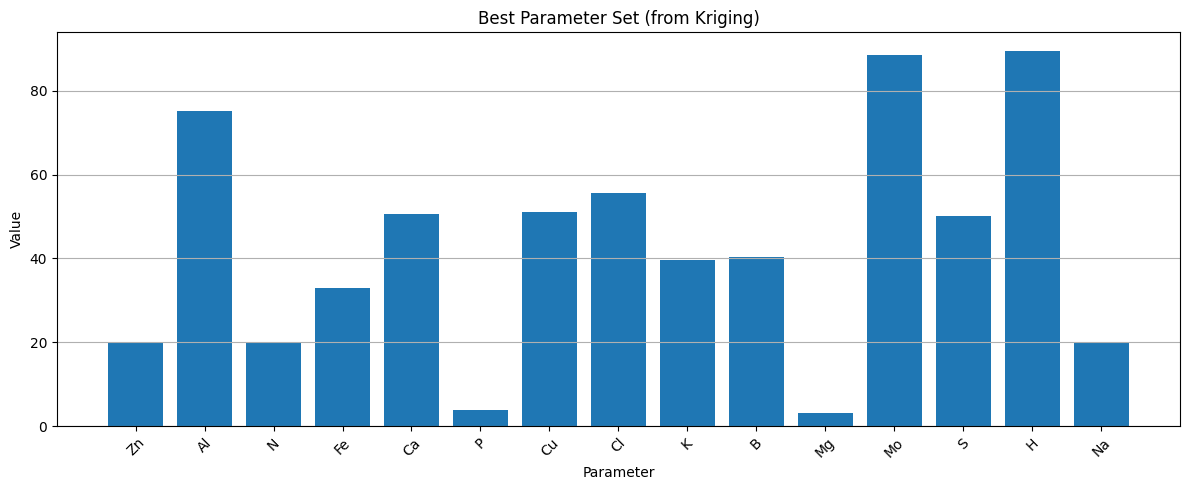

In [37]:
# Assume best_param_dict already defined
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(best_param_dict.keys(), best_param_dict.values())
plt.title("Best Parameter Set (from Kriging)")
plt.xlabel("Parameter")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
